<a href="https://colab.research.google.com/github/mrunalmania/Pytorch-Learning/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 02 Neural network classification

Classfication is a problem of predicting whether something is one thing or another.(there can be multiple things as the options).


In [ ]:
# Make classification data ready

import sklearn

In [ ]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, noise=0.03,random_state=42)



In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print("first five samples of X")
X[:5]

first five samples of X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
print("first five samples of y")
y[:5]

first five samples of y


array([1, 1, 1, 1, 0])

In [ ]:
from sklearn import datasets
# create a dataframe using pandas
import pandas as pd
dataframe = pd.DataFrame({"X1": X[:,0],
                          "X2": X[:,1],
                          "Labels": y})
dataframe

,X1,X2,Labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


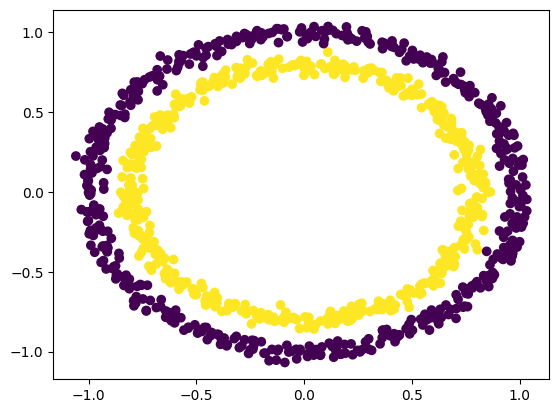

In [ ]:
# visualize, visualize, visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y = X[:,1],
            c=y
            )

Note: The data we are working with is often reffered to as a toy dataset, the dataset which is small enough to experiment, but sizable enough to practice the fundamentals

## check the input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one shape of X: {X_sample} and same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and same for y: {y_sample.shape}")

Values for one shape of X: [0.75424625 0.23148074] and same for y: 1
Shapes for one sample of X: (2,) and same for y: ()


## Turn data into the tensors, and create train and test split.

In [ ]:
import torch
torch.__version__

'1.13.1+cu116'

In [ ]:
# turn data into tensor

# default dtype for numpy ndarray is float64 , torch default dtype is float32

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# split the data into training and test set.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## 2. Building a model

let's build a model to classify our blue and red dots

To do so, I want to:
1. Setup a device agnostic code so our code will run on accelerator (GPU) if there is one.
2. Construct a model (by subclassing `nn.module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# import torch
import torch
from torch import nn

# set device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cpu'

## coding a small neural network to handle our claassification data.
Now we have setup a device agnostic code, let's create a model that:

1. Subclass `nn.Module` (almost all models in pytoch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layer that capable of handling the shapes of our data.
3. Defines a `foward()` method that outlines the foward pass (or forward computation) of the model.
4. Instanstiate an instance of our model class and send it to the target device.

In [ ]:
# 1. Consturct the model that subclass the nn.Module.
class CircleModelV0(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.layer_0 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 out features.
    self.layer_1 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3 define forward() method
  def forward(self,x):
    return self.layer_1(self.layer_0(self.x)) # x-> layer_0 -> layer_1 -> output

# instantiate an instance of our model class and send it to the target device.
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_0): Linear(in_features=2, out_features=5, bias=True)
  (layer_1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# # lets replicate above model with nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6280,  0.5185],
                      [-0.3008,  0.1335],
                      [ 0.0985, -0.5997],
                      [ 0.6083,  0.3192],
                      [-0.5689,  0.0731]])),
             ('0.bias', tensor([ 0.4851,  0.1331,  0.1816, -0.5631,  0.6351])),
             ('1.weight',
              tensor([[-0.2750,  0.3220,  0.2591,  0.0076,  0.0981]])),
             ('1.bias', tensor([0.1431]))])

In [ ]:
from torch.autograd.grad_mode import inference_mode
# Make some predictions
with inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of the predictions: {len(untrained_preds)} and shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)} and shape: {X_test.shape}")
print(f"\n First 10 predictions\n {torch.round(untrained_preds[:10])}")
print(f"\n First 10 labels:\n {y_test[:10]}")

Length of the predictions: 200 and shape: torch.Size([200, 1])
Length of test samples: 200 and shape: torch.Size([200, 2])

 First 10 predictions
 tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])

 First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## Setup a loss function and optimizer

Which loss function or optimizer should we choose?

Again its specifc to scenarios.

For regression we might want to use MAE or MSE (mean absolute error or mean squared error)

For classificaton we might want to use Binary Cross Entropy , or categorical cross entropy.

As a reminder, a loss functions measures how wrong your models predictions are.

And for optimizers, two of most common are SGD(stochatic gradient descent) and Adma. However pytorch has many builtin options.

In [ ]:
# set up a loss function


loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

# set up a optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true,y_preds):
  correct = torch.eq(y_true,y_preds).sum().item()
  acc = (correct/len(y_preds))*100
  return acc


# train model

we are going to follow below steps.

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step (gradient descent)

## Going from raw logits -> prediction probabilities -> prediction lables

Our models outputs are going to be **raw logits.**

We can convert this logits to prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multi class classifictaion.)

Then we can convert our model predictions to prediction labels by either rounding them or using `softmax()`.

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0286],
        [-0.0771],
        [ 0.1997],
        [-0.0937],
        [ 0.3603]])

In [ ]:
# use torch.sogmoid() to turn the logis to prediction probabilities.
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.4929],
        [0.4807],
        [0.5498],
        [0.4766],
        [0.5891]])

For our prediction probability values, we need to perform a range-style rounding on them.
* y_pred_probs >= 0.5 -> y = 1(class 1)
* y_pred_probs < 0.5 -> y = 0 (class 0)

In [ ]:
y_preds = torch.round(y_preds_probs)

# logits -> prediction probability -> prediction labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# lets check the equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

# Training and testing loop

In [ ]:
# set up a manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# epochs
epochs = 1000

# put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# buikd training and evaluation loop
for epoch in range(epochs):
  # Training
  model_0.train()

  # 1 Forward pass
  y_logits = model_0(X_train).squeeze()
  # pass the activation function and make logits to prediction probabilities
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2 Loss function and accuracy calculator

  # suppose we use BCELoss as  loss function, then we need to pass prediction probability.
  # loss = torch.BCELoss(torch.sigmoid(y_logits))
  
  loss = loss_fn(y_logits # here we have used BCEWithLogitLoss so we need to pass logit instead of pred.
                ,y_train)
  accuracy = accuracy_fn(y_train,y_preds=y_pred)
  #3 optimizer grad zero
  optimizer.zero_grad()

  #4 loss backwrd (backpropagation)
  loss.backward()

  #5 optimizer step (gradient descent)
  optimizer.step()

  # testing..

  model_0.eval()
  with inference_mode():
    y_logits_test = model_0(X_test).squeeze()
    y_pred_test = torch.round(torch.sigmoid(y_logits_test))

    #2 calculate the test loss
    test_loss = loss_fn(y_logits_test,y_test)

    test_accuracy = accuracy_fn(y_true=y_test,y_preds=y_pred_test)
  
  # print out whats happenin
  if epoch%10 == 0:
    print(f"Epoch : {epoch} | Loss: {loss:.5f} | Acc: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_accuracy:.2f}% ")

  




Epoch : 0 | Loss: 0.70082 | Acc: 53.25% | Test Loss: 0.69387 | Test Accuracy: 55.50% 
Epoch : 10 | Loss: 0.69791 | Acc: 51.75% | Test Loss: 0.69251 | Test Accuracy: 51.00% 
Epoch : 20 | Loss: 0.69654 | Acc: 51.12% | Test Loss: 0.69215 | Test Accuracy: 51.50% 
Epoch : 30 | Loss: 0.69573 | Acc: 50.38% | Test Loss: 0.69206 | Test Accuracy: 49.50% 
Epoch : 40 | Loss: 0.69516 | Acc: 50.62% | Test Loss: 0.69206 | Test Accuracy: 50.00% 
Epoch : 50 | Loss: 0.69473 | Acc: 50.00% | Test Loss: 0.69210 | Test Accuracy: 50.50% 
Epoch : 60 | Loss: 0.69439 | Acc: 50.25% | Test Loss: 0.69217 | Test Accuracy: 50.50% 
Epoch : 70 | Loss: 0.69413 | Acc: 50.25% | Test Loss: 0.69225 | Test Accuracy: 50.00% 
Epoch : 80 | Loss: 0.69391 | Acc: 50.50% | Test Loss: 0.69235 | Test Accuracy: 50.00% 
Epoch : 90 | Loss: 0.69374 | Acc: 50.12% | Test Loss: 0.69246 | Test Accuracy: 49.50% 
Epoch : 100 | Loss: 0.69360 | Acc: 50.38% | Test Loss: 0.69257 | Test Accuracy: 49.50% 
Epoch : 110 | Loss: 0.69349 | Acc: 50.62% |

##  4 .  Make prediction and evaluate the model

From the metric's its look like our model isn't learn anything.

So to inspect it let's make some predictions and make them visual.

In other words "Visualize, Visualize, Visualize"

In [ ]:
# we need to download helper function file from daniel's gitHub.
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper function availale, no need to download it.")
else:
  print("helper_function.py available")
  re = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py",'wb') as f:
    f.write(re.content)
from helper_functions import plot_decision_boundary

helper_function.py available


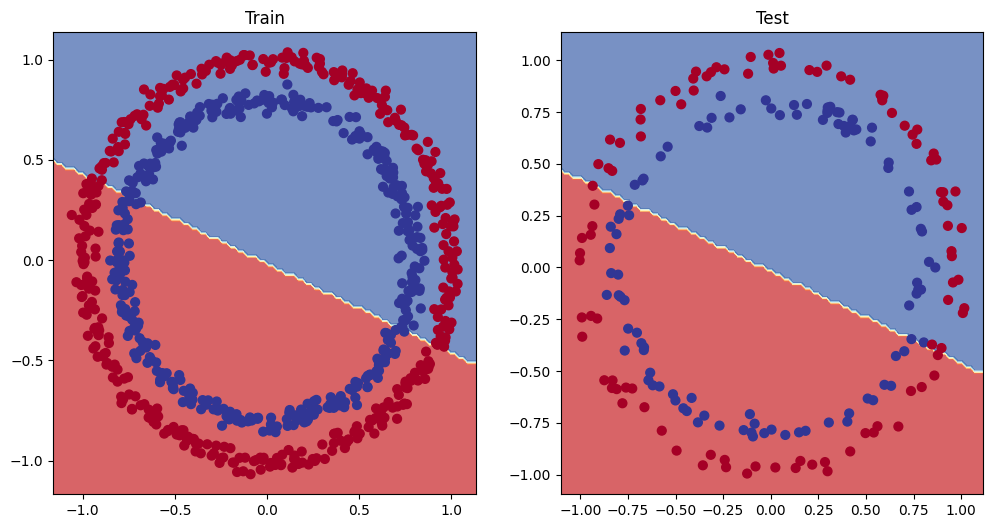

In [ ]:
# plot decision boundry of the model.
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# discusing the question to improv the label

* Add more layers - give model more chance to learn about the patterns in the data.
*Add more hidden units - go from 5 hidden units to 10 hidden units
* Changing the activation function
* change the learning rate
* change the loss function.

This options are form the model perspective, because they all deal directly with model.

Because these options are all values we (as a ML/ Data science engineer) can change it, they are referred as **hyperparameter**

Lets try to improve our model by
* Adding more hidden layer 5-> 10
* Adding more layer -> 2->3
* Increase the number of epochs 100->1000


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  
  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing opertations speedup where posible behind the scene.

model_1 = CircleModelV1().to(device)
model_1
    


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#create a loss function

loss_fn_1 = nn.BCEWithLogitsLoss()
# creat an optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)



In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


epochs = 1000
# # put the data on  target device:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
  # training:
  model_1.train()

  # forward pass
  y_logits = model_1(X_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> prediction probabilities -> prediction labels

  # calculate the loss, accuracy
  loss = loss_fn_1(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train, y_preds=y_pred)

  # 3. Optimizer:
  optimizer.zero_grad()

  # loss backward propogation
  loss.backward()

  # step:
  optimizer.step()

  #Testing:
  model_1.eval()
  with inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss = loss_fn_1(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test, y_preds = test_pred)

  # print what's happenin
  if epoch%100 == 0:
    print(f"epoch: {epoch} || Loss: {loss:.2f} || Acc: {acc:.2f}% || Test Loss: {test_loss:.2f} || Test Acc: {test_acc:.2f}%")






epoch: 0 || Loss: 0.69 || Acc: 50.88% || Test Loss: 0.69 || Test Acc: 51.00%
epoch: 100 || Loss: 0.69 || Acc: 50.38% || Test Loss: 0.69 || Test Acc: 48.00%
epoch: 200 || Loss: 0.69 || Acc: 51.12% || Test Loss: 0.69 || Test Acc: 46.00%
epoch: 300 || Loss: 0.69 || Acc: 51.62% || Test Loss: 0.69 || Test Acc: 45.00%
epoch: 400 || Loss: 0.69 || Acc: 51.12% || Test Loss: 0.69 || Test Acc: 46.00%
epoch: 500 || Loss: 0.69 || Acc: 51.00% || Test Loss: 0.69 || Test Acc: 46.00%
epoch: 600 || Loss: 0.69 || Acc: 51.00% || Test Loss: 0.69 || Test Acc: 46.00%
epoch: 700 || Loss: 0.69 || Acc: 51.00% || Test Loss: 0.69 || Test Acc: 46.00%
epoch: 800 || Loss: 0.69 || Acc: 51.00% || Test Loss: 0.69 || Test Acc: 46.00%
epoch: 900 || Loss: 0.69 || Acc: 51.00% || Test Loss: 0.69 || Test Acc: 46.00%


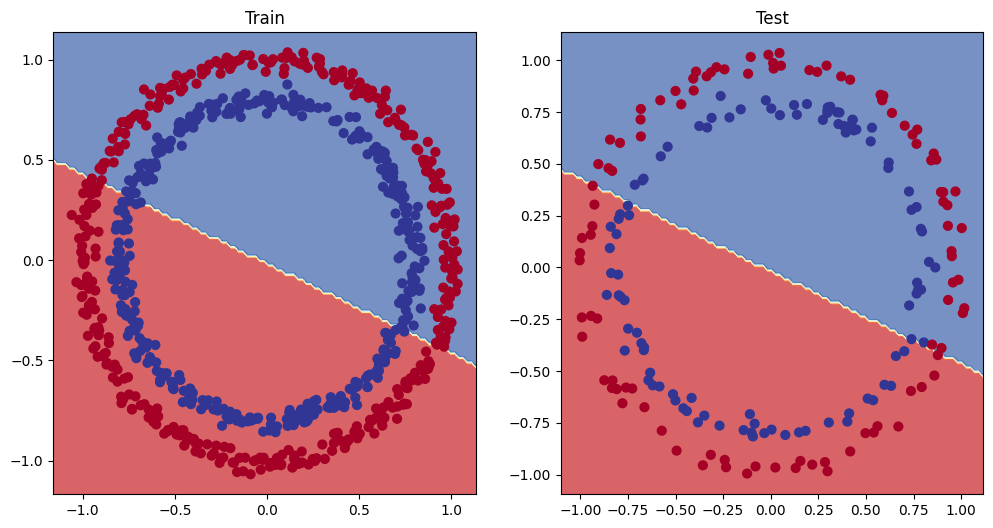

In [ ]:
# plot the decision boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 5.1 preparing the data to see if out model can fit a straight line

One way to troubleshoot a large problem is to test out a smaller problem.

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# train and test spli
train_split = int(0.8*len(X_regression))
X_train_regression,y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)


(80, 80, 20, 20)

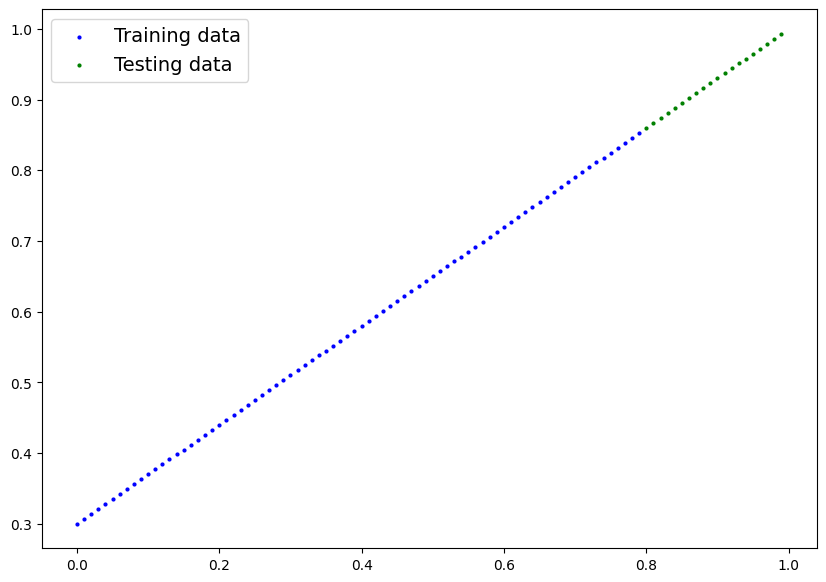

In [ ]:
from helper_functions import plot_predictions
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression,
                 test_data= X_test_regression, test_labels=y_test_regression )


In [ ]:
# 5.1 adjusting the model_1 to fit the straight line
   # same architecutre of model_1 but in_features = 1

model_2 = nn.Sequential( 
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
 ).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)


In [ ]:
# train model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
# put data on target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing:
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)
  
  # print whats happenin
  if epoch%100 == 0:
    print(f"epoch: {epoch} || Loss : {loss:.5f} || Test Loss: {test_loss:.5f}")
  



epoch: 0 || Loss : 0.75986 || Test Loss: 0.91103
epoch: 100 || Loss : 0.02858 || Test Loss: 0.00081
epoch: 200 || Loss : 0.02533 || Test Loss: 0.00209
epoch: 300 || Loss : 0.02137 || Test Loss: 0.00305
epoch: 400 || Loss : 0.01964 || Test Loss: 0.00341
epoch: 500 || Loss : 0.01940 || Test Loss: 0.00387
epoch: 600 || Loss : 0.01903 || Test Loss: 0.00379
epoch: 700 || Loss : 0.01878 || Test Loss: 0.00381
epoch: 800 || Loss : 0.01840 || Test Loss: 0.00329
epoch: 900 || Loss : 0.01798 || Test Loss: 0.00360


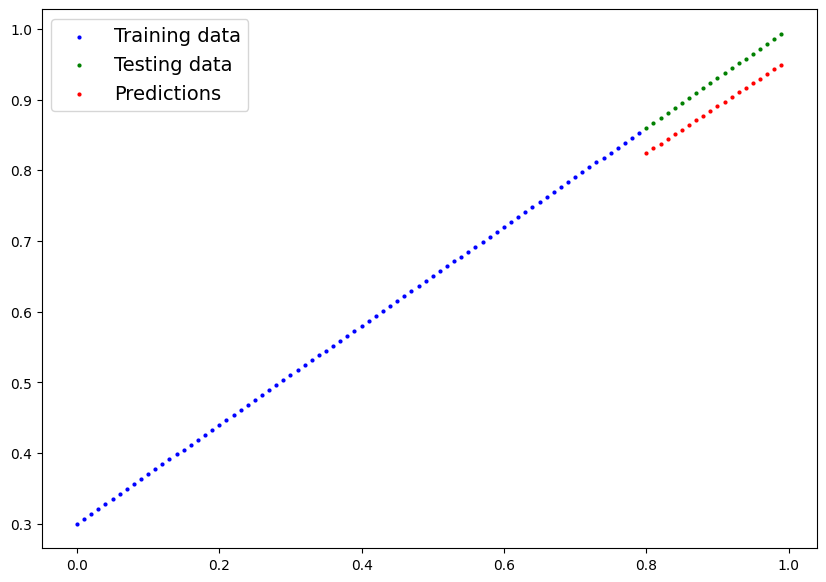

In [ ]:
# turn on evaluation mode 
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data = X_train_regression, train_labels=y_train_regression,
                 test_data = X_test_regression, test_labels=y_test_regression,
                 predictions=y_preds)

# 6. The missing piece: non-linearity

"What patterns could you dray if you were given an infinite amount of straight and non-straight lines

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?




 ## 6.1 recreating non-Linear data (red and blue circles)

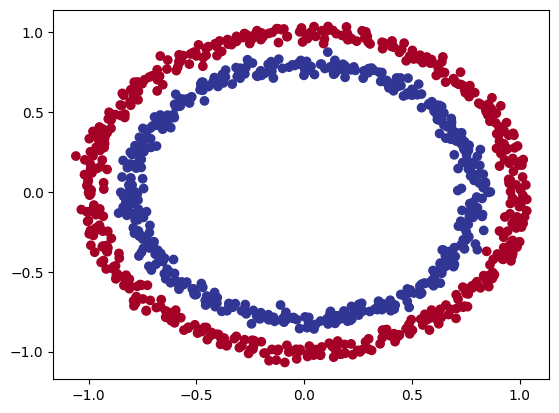

In [ ]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n =  1000
X,y = make_circles(n,
                   noise=0.03,
                   random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)


In [ ]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn the data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# Build model with non-linearity

* Linear - Straight Line
* Non-linear - non-straight line4

Artificial neural networks are large combination of linear (straight) and non-linear (non-straight) functions which are potentially able to find patterns in data.

In [ ]:
# build a model with non-linear functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
  
  def forward(self,x):
    # where should we put our non-linear activation function
    # relu is an non-linaer activation function
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# setup loss and optimizer

loss_fn_2 = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)


In [ ]:
## train model with non-linearity

#random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  model_3.train()

  # 1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn_2(y_logits,y_train) # we use BCEWithLogitsLoss which takes logits as a first input
  acc = accuracy_fn(y_train,y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. back propogation
  loss.backward()

  # 5 step the optimizer
  optimizer.step()

  ## testing 
  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn_2(test_logits,y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  # print out what happenin
  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | test_loss: {test_loss:.4f} | test_acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6929 | Acc: 50.00% | test_loss: 0.6932 | test_acc: 50.00%
Epoch: 100 | Loss: 0.6912 | Acc: 52.88% | test_loss: 0.6910 | test_acc: 52.50%
Epoch: 200 | Loss: 0.6898 | Acc: 53.37% | test_loss: 0.6894 | test_acc: 55.00%
Epoch: 300 | Loss: 0.6879 | Acc: 53.00% | test_loss: 0.6872 | test_acc: 56.00%
Epoch: 400 | Loss: 0.6852 | Acc: 52.75% | test_loss: 0.6841 | test_acc: 56.50%
Epoch: 500 | Loss: 0.6810 | Acc: 52.75% | test_loss: 0.6794 | test_acc: 56.50%
Epoch: 600 | Loss: 0.6751 | Acc: 54.50% | test_loss: 0.6729 | test_acc: 56.00%
Epoch: 700 | Loss: 0.6666 | Acc: 58.38% | test_loss: 0.6632 | test_acc: 59.00%
Epoch: 800 | Loss: 0.6516 | Acc: 64.00% | test_loss: 0.6476 | test_acc: 67.50%
Epoch: 900 | Loss: 0.6236 | Acc: 74.00% | test_loss: 0.6215 | test_acc: 79.00%


# 6.4 evaluating model trained with non-linear activation functions

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10] , y_test[:10] 


(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

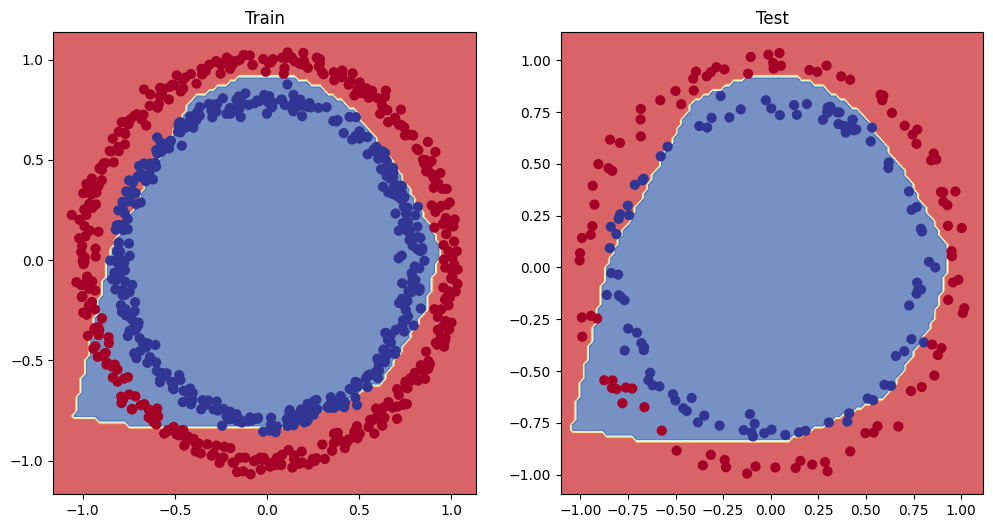

In [ ]:
# plot decisionboundries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

# 7. replicating non-linear activation functions
Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear and non-linear functions.



In [ ]:
# Create a tensor
A = torch.arange(-10,10,1.0,dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

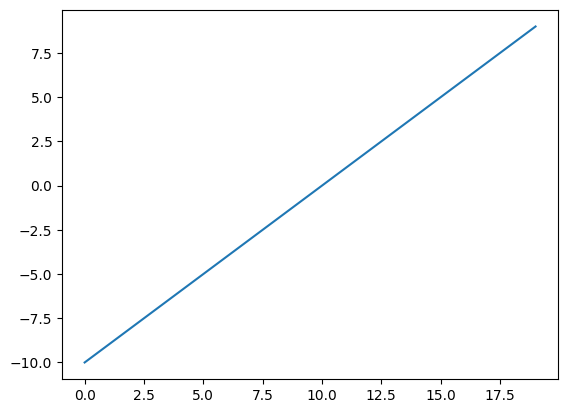

In [ ]:
# Visualize this data
plt.plot(A)

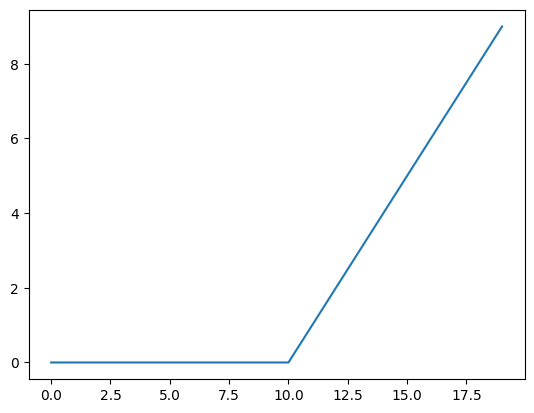

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x) # input must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

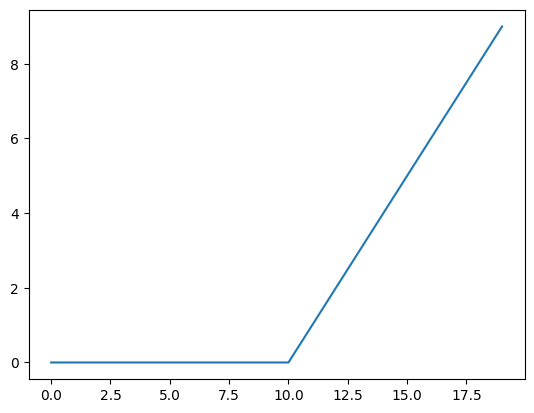

In [ ]:
# Plot relu activation fn, custom 

plt.plot(relu(A))

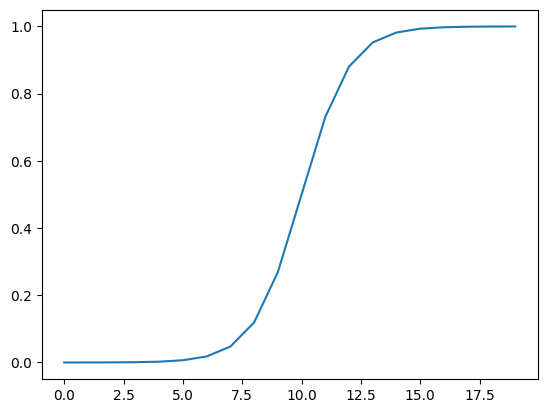

In [ ]:
# lets do  the same for sigmoid
plt.plot(torch.sigmoid(A))


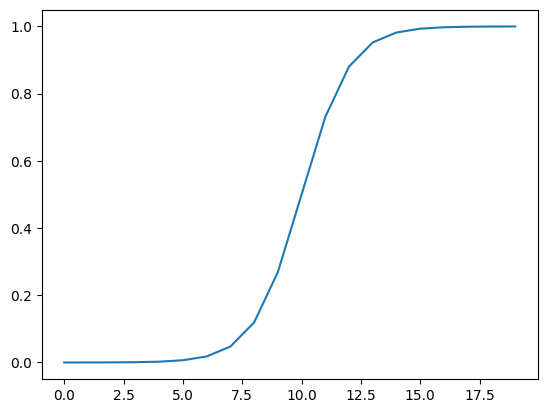

In [ ]:
#custom sigmoid

def sigmoid(x):
  return 1/(1+torch.exp(-x))

plt.plot(sigmoid(A))

# putting it all together with a multi class classification problem

*  Binary classification = one thing or another( cat vs dog, spam or not spam, fraud or not fraud)

* Multi-class classification = more than one thing or another.


## 8.1 Creating a toy multi-class dataset

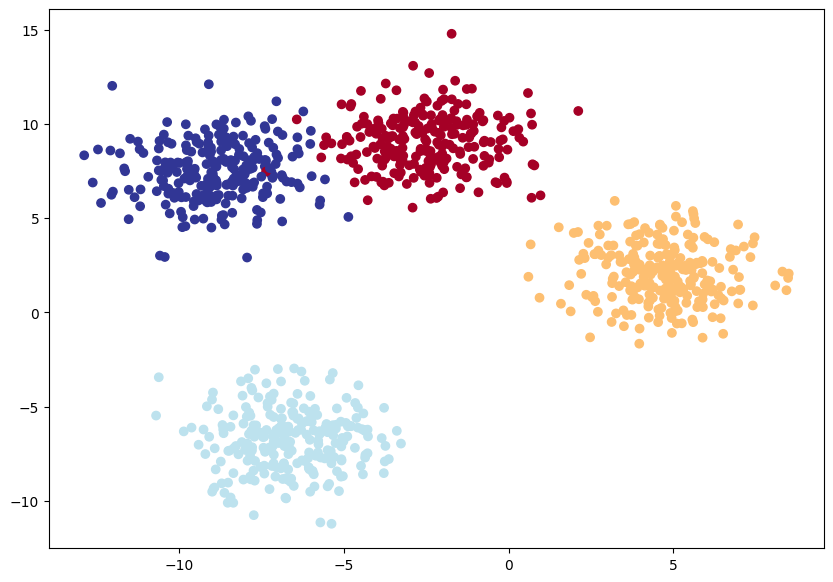

In [ ]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameter
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEEDS = 42

# 1. create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std=1.5, # give the cluster to little shake up
                            random_state=RANDOM_SEEDS)
# 2. turn the data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state=RANDOM_SEEDS)
# 4. visualize visualize visualize
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)


#8.2 Building a multi-class classification model in pytorch
 

In [ ]:
# create a device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [ ]:
# build a multi-class classification problem
class BlobModel(nn.Module):
  def __init__(self,input_feature, output_feature, hidden_units=8):
    """ Initializes multi-class classification model.
    Args:
    
    input_features (int): Number of input features to the model
    
    output_features (int): Number of outputs features (number of output classes)
    hidden_units (int): Number of hidden units between layers, default 8
    
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_feature,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features = output_feature)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)
    
# create an instance of blob model, and send it to target device
model_4 = BlobModel(input_feature=2,
                    output_feature=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# create a loss function and optimizer - loss function measures how wrong our model's predictions are
# in pytorch, lossfunction = criterion = cost function
# when we have inbalance dataset, then wight parameter come into picture
loss_fn_3 =  nn.CrossEntropyLoss()

# create an optimizer - optimizer updates our model parameters
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1) # lr is hyperparamete , we can change it.


# 8.4 Getting prediction probabilities for a multi-class PyTorch model
In order to evaluate and train and test our model, we need to convert our model's raw outputs(logits) to prediction probolities and then to prediction labels.

Logits-> pred_probs ( use `torch.softmax`) -> pred labels ( use argmax)

In [ ]:
# lets get some raw output of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_pred_t2 = model_4(X_blob_train)
y_pred_t2[:10]

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923],
        [-0.2044, -1.1380, -0.9468, -0.3093],
        [-0.2613, -1.2852, -1.0251, -0.2935],
        [-0.5237, -0.5791, -1.1276, -0.8689],
        [-0.0423, -0.8228, -0.4666, -0.0986],
        [-0.1876, -1.1245, -0.8498, -0.2406]])

In [ ]:
# logits -> softmax(activation function) prediction prob -> round, argmax (pred labels)
# convert our model's logits output to pred prob
y_pred_prob = torch.softmax(y_pred_t2, dim=1)
print(y_pred_prob[:5])


tensor([[0.3080, 0.3328, 0.1441, 0.2150],
        [0.3577, 0.1324, 0.1696, 0.3402],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3000, 0.1845, 0.2743, 0.2413],
        [0.3424, 0.1450, 0.1936, 0.3190]])


In [ ]:
torch.sum(y_pred_prob[0])

tensor(1.)

In [ ]:
torch.max(y_pred_prob[0])

tensor(0.3328)

In [ ]:
torch.argmax(y_pred_prob[0]) # gives us the index which has highest prob

tensor(1)

In [ ]:
# convert our model's prob to prediction labels
y_pred = torch.argmax(y_pred_prob, dim=1)
y_pred

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
        3, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 8.5 Creating a training loop and testing loop for a multi-class pytorch model

In [ ]:
# fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs  = 100

# put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  model_4.train()

  y_logits  = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss  = loss_fn_3(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_preds=y_pred)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing:
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn_3(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_preds=test_pred)
  
  # print whats happenin
  if epoch%10 == 0:
    print(f"Epochs: {epoch}| loss: {loss:.4f} | accuracy: {acc:.2f}% | test loss: {test_loss:.4f} | test acc: {test_acc:.2f}% ")
  



Epochs: 0| loss: 1.1588 | accuracy: 40.38% | test loss: 1.0755 | test acc: 48.00% 
Epochs: 10| loss: 0.6448 | accuracy: 96.75% | test loss: 0.6607 | test acc: 97.50% 
Epochs: 20| loss: 0.4254 | accuracy: 98.50% | test loss: 0.4307 | test acc: 100.00% 
Epochs: 30| loss: 0.2529 | accuracy: 99.12% | test loss: 0.2451 | test acc: 99.50% 
Epochs: 40| loss: 0.1123 | accuracy: 99.25% | test loss: 0.1023 | test acc: 99.50% 
Epochs: 50| loss: 0.0663 | accuracy: 99.25% | test loss: 0.0585 | test acc: 99.50% 
Epochs: 60| loss: 0.0507 | accuracy: 99.25% | test loss: 0.0429 | test acc: 99.50% 
Epochs: 70| loss: 0.0430 | accuracy: 99.25% | test loss: 0.0349 | test acc: 99.50% 
Epochs: 80| loss: 0.0384 | accuracy: 99.25% | test loss: 0.0299 | test acc: 99.50% 
Epochs: 90| loss: 0.0352 | accuracy: 99.25% | test loss: 0.0266 | test acc: 99.50% 


# 8.6 Making and evaluating predictions with pytoch multi-class model


In [ ]:
# Make predictions
model_4.eval()
with inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [ ]:
# Go from logits- >pred prob -> pred labels
y_pred_prob = torch.softmax(y_logits, dim=1)
y_pred_prob[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
# Go from pred_probs to pred_lables
y_preds = torch.argmax(y_pred_prob, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

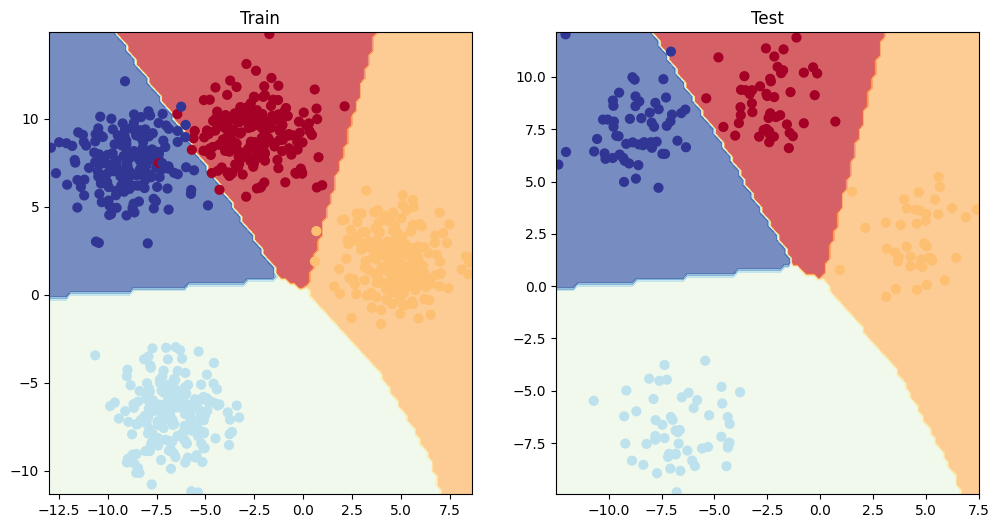

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test, y_blob_test)

# 9 few more classification metrics...(to evaluate our classification model)

* Accuracy - out of 100 samples how many of that get right

* Precision
* Recall
* F1 score
* Confusion Matrix
* Classification report

In [ ]:
 !pip install torchmetrics 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 9.8 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# setup metric
accuracy_metrics = Accuracy(task="multiclass", num_classes=4)

# calculate the accuracy
accuracy_metrics(y_preds, y_blob_test)

tensor(0.9950)